In [ ]:
# ! pip install -q kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import os
# os.environ['username'] = 'rekhalodhi' # username from the json file
# os.environ['key'] = 'b3a5d08ff70b9f6c085a23d12bc9b1a0' # key from the json file

In [ ]:
# !kaggle datasets download -d wordsforthewise/lending-club

 98% 1.24G/1.26G [00:10<00:00, 139MB/s]
100% 1.26G/1.26G [00:10<00:00, 124MB/s]


In [ ]:
pwd

'/content'

In [ ]:
!ls

drive  sample_data


In [395]:
%cd /content/drive/MyDrive/major_project

/content/drive/MyDrive/major_project


In [ ]:
pwd

'/content/drive/MyDrive/major_project'

In [ ]:
# !unzip '/content/lending-club.zip' -d '/content/drive/MyDrive/major_project/data/'

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
accepted_file_path = r'/content/drive/MyDrive/major_project/data/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv'
rejected_file_path = r'/content/drive/MyDrive/major_project/data/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv'

In [5]:
df_accepted = pd.read_csv(accepted_file_path, low_memory = True)
df_rejected = pd.read_csv(rejected_file_path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df_accepted.shape

(2260701, 151)

In [7]:
pd.set_option('display.max_rows',151)
pd.set_option('display.max_columns',151)

In [ ]:
df_accepted.head(5)

In [ ]:
df_accepted.columns

In [ ]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [8]:
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off', 'default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]

In [ ]:
len(list(df_accepted['title'].unique()))

63153

In [ ]:
np.sort(df_accepted['purpose'].unique())

array(['car', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
       'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding'], dtype=object)

In [ ]:
df_accepted['pymnt_plan'].unique()

array(['n'], dtype=object)

In [ ]:
np.sort(df_accepted['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
df_accepted['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [ ]:
df_accepted.info(verbose=True, null_counts=True)

In [9]:
df_accepted.shape

(1348059, 151)

In [ ]:
df_accepted.describe().T

In [10]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Charged Off                                             268559
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Name: loan_status, dtype: int64

In [12]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * mis_val / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename( columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(2)
        print ('Dataframe has ' + str(df.shape[1]) + ' columns.\n'  'There are ' + str(mis_val_table_ren_columns.shape[0]) +  ' columns that have missing values.')
        return mis_val_table_ren_columns

In [13]:
miss_values_accepted = null_values(df_accepted)
miss_values_accepted.head()

Dataframe has 151 columns.
There are 113 columns that have missing values.


,Missing Values,% of Total Values
member_id,1348059,100.00
next_pymnt_d,1345310,99.80
orig_projected_additional_accrued_interest,1344300,99.72
hardship_status,1342305,99.57
hardship_length,1342305,99.57


In [14]:
df_accepted_dropped = df_accepted.drop(df_accepted.loc[:, df_accepted.isna().mean().sort_values() > 0.5].columns, axis=1)

In [15]:
df_accepted_dropped.shape

(1348059, 93)

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head()

Dataframe has 93 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
mths_since_recent_inq,176820,13.12
num_tl_120dpd_2m,120150,8.91
mo_sin_old_il_acct,108324,8.04
emp_title,85944,6.38
emp_length,78545,5.83


In [16]:
unneeded_columns = ['id', 'grade', 'emp_title', 'url', 'title', 'zip_code']

In [17]:
df_accepted_dropped = df_accepted_dropped.drop(unneeded_columns, axis=1)

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

In [18]:
df_accepted_dropped.shape

(1348059, 87)

In [19]:
df_accepted_dropped = df_accepted_dropped.drop(['hardship_flag', 'pymnt_plan'], axis=1)

In [20]:
df_accepted_dropped.select_dtypes('object').head()

,term,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag
0,36 months,C4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,Cash,N
1,36 months,C1,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,small_business,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,Cash,N
2,60 months,B4,10+ years,MORTGAGE,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,Cash,N
4,60 months,F1,3 years,MORTGAGE,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,Cash,N
5,36 months,C3,4 years,RENT,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,Oct-1987,w,May-2017,May-2017,Individual,Cash,N


Check employement length and set values 0 for smaller than 1 emp_length and 11 for greater than 10 value

In [21]:
df_accepted_dropped['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [22]:
df_accepted_dropped['emp_length'] = df_accepted_dropped['emp_length'].replace({'< 1 year': '0 years', '10+ years': '11 years'})

In [23]:
df_accepted_dropped.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C4,11 years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C1,11 years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B4,11 years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F1,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C3,4 years,RENT,34000.0,Source Verified,Dec-2015,Fully Paid,debt_consolidation,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,w,0.0,0.0,13708.948530,13708.95,11950.0,1758.95,0.0,0.0,0.0,May-2017,7653.56,May-2017,759.0,755.0,0.0,1.0,Individual,0.0,0.0,12798.0,12900.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash,N


In [ ]:
df_accepted_dropped.columns.sort_values()

Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc',
       'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs',
       'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line',
       'emp_length', 'fico_range_high', 'fico_range_low', 'funded_amnt',
       'funded_amnt_inv', 'home_ownership', 'initial_list_status',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_

In [ ]:
miss_values_accepted = null_values(df_accepted_dropped)
miss_values_accepted.head(52)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


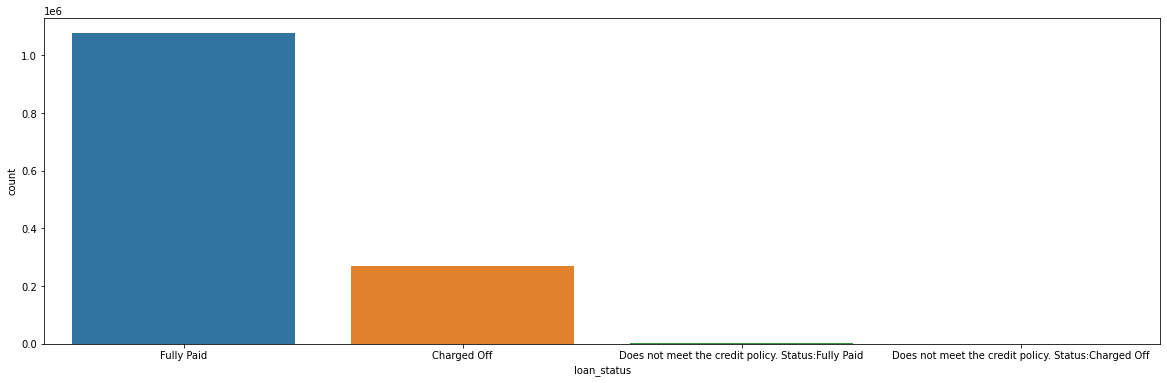

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df_accepted.loan_status)

In [24]:
keep_list = ['annual_inc','avg_cur_bal', 'dti', 'emp_length','fico_range_low', 'sub_grade', 'home_ownership', 'initial_list_status',
       'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose', 'revol_util', 'term', 'verification_status']

In [25]:
len(keep_list)

18

In [26]:
drop_list = [col for col in df_accepted_dropped.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'issue_d', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'nu

In [27]:
df_accepted_dropped.drop(labels=drop_list, axis=1, inplace=True)

In [28]:
df_accepted_dropped.shape

(1348059, 18)

In [29]:
df_accepted_dropped.columns.sort_values()

Index(['annual_inc', 'avg_cur_bal', 'dti', 'emp_length', 'fico_range_low',
       'home_ownership', 'initial_list_status', 'installment', 'int_rate',
       'loan_amnt', 'loan_status', 'mort_acc', 'pub_rec', 'purpose',
       'revol_util', 'sub_grade', 'term', 'verification_status'],
      dtype='object')

In [ ]:
{column: list(df_accepted_dropped[column].unique()) for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'}

{'emp_length': ['11 years',
  '3 years',
  '4 years',
  '6 years',
  '7 years',
  '8 years',
  '2 years',
  '5 years',
  '9 years',
  '0 years',
  '1 year',
  nan],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'initial_list_status': ['w', 'f'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Does not meet the credit policy. Status:Fully Paid',
  'Does not meet the credit policy. Status:Charged Off'],
 'purpose': ['debt_consolidation',
  'small_business',
  'home_improvement',
  'major_purchase',
  'credit_card',
  'other',
  'house',
  'vacation',
  'car',
  'medical',
  'moving',
  'renewable_energy',
  'wedding',
  'educational'],
 'sub_grade': ['C4',
  'C1',
  'B4',
  'F1',
  'C3',
  'B2',
  'B1',
  'A2',
  'B5',
  'C2',
  'E2',
  'A4',
  'E3',
  'C5',
  'A1',
  'D4',
  'F3',
  'D1',
  'B3',
  'D3',
  'D5',
  'A5',
  'F2',
  'E4',
  'D2',
  'E1',
  'F5',
  'E5',
  'A3',
  'G2',
  'G1',
  'G3',
  'G4',
  'F4',
  'G5'],
 'term': [' 36 months', ' 60 month

In [98]:
# sns.heatmap(df_accepted_dropped)

# **Encoding categorical variables**

### With the help of OrdinalEncoder() and some lamda function techniques. 
Because Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before we can use it to fit and evaluate a model

In [317]:
#deep copy of the data created
df_copy = df_accepted_dropped.copy(deep= True) 

In [318]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348059 non-null  float64
 1   term                 1348059 non-null  object 
 2   int_rate             1348059 non-null  float64
 3   installment          1348059 non-null  float64
 4   sub_grade            1348059 non-null  object 
 5   emp_length           1269514 non-null  object 
 6   home_ownership       1348059 non-null  object 
 7   annual_inc           1348055 non-null  float64
 8   verification_status  1348059 non-null  object 
 9   loan_status          1348059 non-null  object 
 10  purpose              1348059 non-null  object 
 11  dti                  1347685 non-null  float64
 12  fico_range_low       1348059 non-null  float64
 13  pub_rec              1348030 non-null  float64
 14  revol_util           1347162 non-null  float64
 15

In [319]:
sorted([column for column in df_accepted_dropped if df_accepted_dropped.dtypes[column] == 'object'])

['emp_length',
 'home_ownership',
 'initial_list_status',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [320]:
df_copy['home_ownership'] = df_copy['home_ownership'].replace(['ANY', 'NONE'], 'OTHER')   #replacing 'ANY','NONE' with the 'OTHER'
df_copy['emp_length'] = df_copy['emp_length'].fillna('0 year')                            #replacing 'nan values with the zero'

In [321]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()           #creating object for the ordinal encoder      

In [322]:
#employement length

df_copy['emp_length'].unique()                                                            #find unique values in the emp_length column.

df_copy['emp_length'] = df_copy['emp_length'].apply(lambda s: int(s[0:2]))                #slicing and changing values to int
df_copy['emp_length'].unique()

array([11,  3,  4,  6,  7,  8,  2,  5,  9,  0,  1])

In [323]:
#home_ownership

df_copy['home_ownership'] = ord_enc.fit_transform(df_copy[['home_ownership']])          #fitting and transforming 'home_ownership' column
df_copy['home_ownership'].sample(5)        

258315     0.0
1088416    0.0
1218514    0.0
346588     3.0
1260515    3.0
Name: home_ownership, dtype: float64

In [324]:
#initial_list_status

in_ls = df_copy['initial_list_status'].unique()
print(in_ls)

df_copy['initial_list_status'] = ord_enc.fit_transform(df_copy[['initial_list_status']])
df_copy['initial_list_status'].sample(5)

['w' 'f']


2167068    1.0
902542     1.0
2259355    1.0
189622     1.0
1174865    1.0
Name: initial_list_status, dtype: float64

In [325]:
# loan_status

ls = np.sort(df_copy['loan_status'].unique())                    #find unique values in loan_status column
print(ls)

df_copy['loan_status'] = ord_enc.fit_transform(df_copy[['loan_status']])        #fit and transform data in laon status column
df_copy['loan_status'].sample(5)

['Charged Off' 'Does not meet the credit policy. Status:Charged Off'
 'Does not meet the credit policy. Status:Fully Paid' 'Fully Paid']


1904806    3.0
317790     0.0
681827     3.0
264820     3.0
81748      3.0
Name: loan_status, dtype: float64

In [326]:
#purpose
pur = df_copy['purpose'].value_counts()

In [327]:
df_copy['purpose'] = ord_enc.fit_transform(df_copy[['purpose']])
df_copy['purpose'].nunique()

14

In [328]:
#sub_grade
sb = np.sort(df_copy['sub_grade'].unique())
print(sb)

df_copy['sub_grade'] = ord_enc.fit_transform(df_copy[['sub_grade']])
df_copy['sub_grade'].unique()

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


array([13., 10.,  8., 25., 12.,  6.,  5.,  1.,  9., 11., 21.,  3., 22.,
       14.,  0., 18., 27., 15.,  7., 17., 19.,  4., 26., 23., 16., 20.,
       29., 24.,  2., 31., 30., 32., 33., 28., 34.])

In [329]:
#term

df_copy['term'] = df_copy['term'].apply(lambda s: s[0:3])                            #slicing values
df_copy['term'] = ord_enc.fit_transform(df_copy[['term']])                         #applying ordinal encoder and converting categorical(obj) --> int  
df_copy['term'].unique()


array([0., 1.])

In [330]:
# verification_status

df_copy['verification_status'] = ord_enc.fit_transform(df_copy[['verification_status']])
df_copy['verification_status'].sample(5)

1265043    0.0
317503     2.0
2149998    1.0
1639213    2.0
1348788    1.0
Name: verification_status, dtype: float64

In [331]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348059 non-null  float64
 1   term                 1348059 non-null  float64
 2   int_rate             1348059 non-null  float64
 3   installment          1348059 non-null  float64
 4   sub_grade            1348059 non-null  float64
 5   emp_length           1348059 non-null  int64  
 6   home_ownership       1348059 non-null  float64
 7   annual_inc           1348055 non-null  float64
 8   verification_status  1348059 non-null  float64
 9   loan_status          1348059 non-null  float64
 10  purpose              1348059 non-null  float64
 11  dti                  1347685 non-null  float64
 12  fico_range_low       1348059 non-null  float64
 13  pub_rec              1348030 non-null  float64
 14  revol_util           1347162 non-null  float64
 15

# **Rejecting** **Outliers from the dataset**

### Here to remove outliers, I have used the IQR( Inter quartile range ) method, data visualization (distribution plot, bar plot). 

Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers from the dataset. They can also impact the basic assumption of Regression and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model.

In [333]:
df_copya = df_copy.copy(deep= True) 

In [334]:
miss_values_accepted = null_values(df_copy)
miss_values_accepted.head(6)

Dataframe has 18 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
avg_cur_bal,70298,5.21
mort_acc,50030,3.71
revol_util,897,0.07
dti,374,0.03
pub_rec,29,0.00
annual_inc,4,0.00


In [335]:
def reject_outliers(sr, iq_range=0.5, side='left', return_mask=False):
    '''
    Takes an array (or pandas series) and returns an array with outliers excluded, according to the
    interquartile range.
    
    Parameters:
    -----------
    sr: array
        array of numeric values
    iq_range: float
        percent to calculate quartiles by, 0.5 will yield 25% and 75%ile quartiles
    side: string
        if 'left', will return everything below the highest quartile
        if 'right', will return everything above the lowest quartile
        if 'both', will return everything between the high and low quartiles

        but in this case, as we want most of the time values only below the highest quartile so the side by default will remain 'left' 
    '''
    pcnt = (1 - iq_range) / 2
    qlow, median, qhigh = sr.dropna().quantile([pcnt, 0.50, 1-pcnt])
    
    iqr = qhigh - qlow
    print(qlow, median, qhigh, iqr)

    if side=='both':
        mask = (sr - median).abs() <= iqr
    elif side=='left':
        mask = (sr - median) <= iqr
    elif side=='right':
        mask = (sr - median) >= iqr
    else:
        print('options for side are left, right, or both')
    
    if return_mask:
        return mask
    
    return sr[mask]

In [375]:
def plot_feature(sr, iq_range, return_mask, side ='left'):
  '''Take an array call reject_outliers function and return an array '''

  no_outliers = reject_outliers(sr = sr, iq_range = iq_range, return_mask = return_mask, side = side)
  df_no_outlier =  sr.loc[no_outliers]              #create a dataset with no outliers to plot a distribution plot 
  sns.distplot(df_no_outlier, kde = False)
  return no_outliers


In [337]:
df_copy.shape

(1348059, 18)

In [338]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348059 entries, 0 to 2260697
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   loan_amnt            1348059 non-null  float64
 1   term                 1348059 non-null  float64
 2   int_rate             1348059 non-null  float64
 3   installment          1348059 non-null  float64
 4   sub_grade            1348059 non-null  float64
 5   emp_length           1348059 non-null  int64  
 6   home_ownership       1348059 non-null  float64
 7   annual_inc           1348055 non-null  float64
 8   verification_status  1348059 non-null  float64
 9   loan_status          1348059 non-null  float64
 10  purpose              1348059 non-null  float64
 11  dti                  1347685 non-null  float64
 12  fico_range_low       1348059 non-null  float64
 13  pub_rec              1348030 non-null  float64
 14  revol_util           1347162 non-null  float64
 15

In [340]:
df_copy['dti'].value_counts().sample(5)

67.71       1
54.64       2
48.87       2
12.78     582
531.33      1
Name: dti, dtype: int64

6.86 17.61 30.31 23.45


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


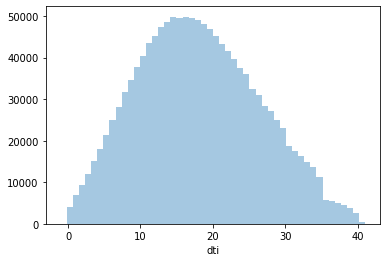

In [342]:
#dti
df_copy['dti'] = df_copy['dti'].fillna(df_copy['dti'].median())
dti_no_outliers = plot_feature(df_copy['dti'], iq_range=0.82, return_mask = True)   #Hit and trial method to find this iq_range
df_copy['dti'] = df_copy['dti'].mask(dti_no_outliers == False)
df_copy['dti'] = df_copy['dti'].fillna(df_copy['dti'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


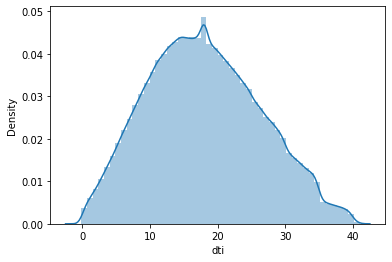

In [343]:
sns.distplot(df_copy['dti'])

26000.0 65000.0 168071.47999999928 142071.47999999928


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


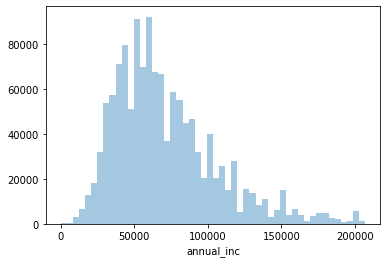

In [344]:
# annual income

df_copy['annual_inc'] = df_copy['annual_inc'].fillna(df_copy['annual_inc'].median())

inc_no_outliers = plot_feature(df_copy['annual_inc'], iq_range=0.92, return_mask = True)
df_copy['annual_inc'] = df_copy['annual_inc'].mask(inc_no_outliers == False)
df_copy['annual_inc'] = df_copy['annual_inc'].fillna(df_copy['annual_inc'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


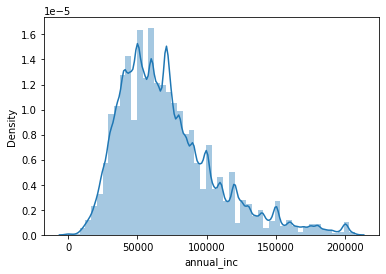

In [345]:
sns.distplot(df_copy['annual_inc'])

86.72999999999999 375.04 1085.48 998.75


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


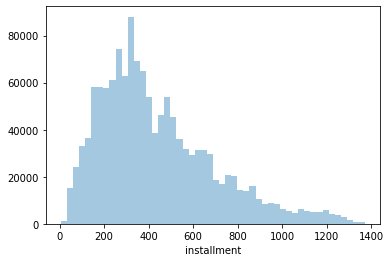

In [347]:
# installment

inst_no_outliers = plot_feature(df_copy['installment'], iq_range=0.94, return_mask = True)
df_copy['installment'] = df_copy['installment'].mask(inst_no_outliers == False)
df_copy['installment'] = df_copy['installment'].fillna(df_copy['installment'].mean())

In [348]:
df_copy['installment'].max()

1373.22

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


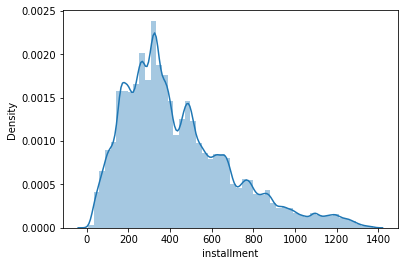

In [349]:
sns.distplot(df_copy['installment'])

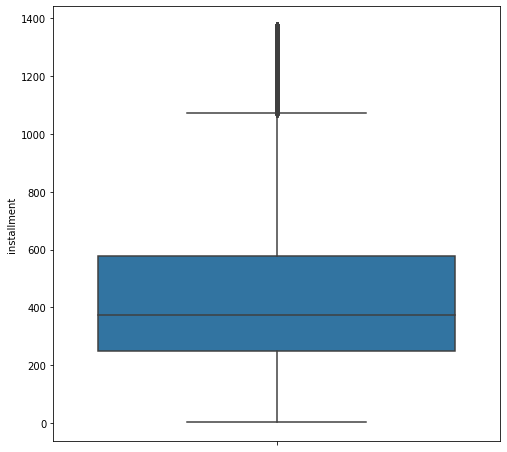

In [350]:
plt.figure(figsize=(8,8))
sns.boxplot( y=df_copy['installment'] )

25.7 52.2 78.1 52.39999999999999


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


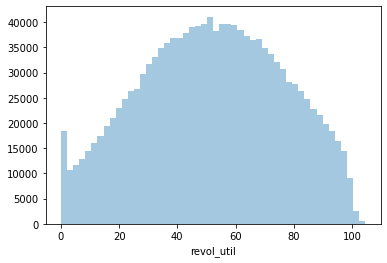

In [352]:
# revol_util

df_copy['revol_util'] = df_copy['revol_util'].fillna(df_copy['revol_util'].median())
ru_no_outliers = plot_feature(df_copy['revol_util'], iq_range=0.67, return_mask = True)
df_copy['revol_util'] = df_copy['revol_util'].mask(ru_no_outliers == False)
df_copy['revol_util'] = df_copy['revol_util'].fillna(df_copy['revol_util'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


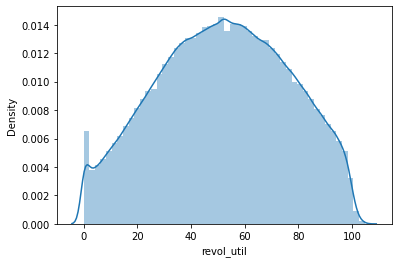

In [353]:
sns.distplot(df_copy['revol_util'])

In [354]:
df_copy['revol_util'].max()

104.6

In [355]:
df_copy['pub_rec'].value_counts()

0.0     1119890
1.0      191027
2.0       24448
3.0        7402
4.0        2630
5.0        1267
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
15.0          9
21.0          6
18.0          6
14.0          5
16.0          5
19.0          5
17.0          3
28.0          3
20.0          3
49.0          2
24.0          2
22.0          2
86.0          1
25.0          1
63.0          1
61.0          1
54.0          1
23.0          1
47.0          1
46.0          1
40.0          1
37.0          1
34.0          1
Name: pub_rec, dtype: int64

0.0 0.0 86.0 86.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'In case if there are outliers in this column'

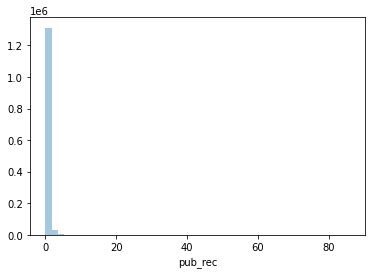

In [357]:
# pub_rec: just replaced nan vlues in this column

df_copy['pub_rec'] = df_copy['pub_rec'].fillna(df_copy['pub_rec'].median())
pr_no_outliers = plot_feature(df_copy['pub_rec'], iq_range=1, return_mask = True)

'''In case if there are outliers in this column'''
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(pr_no_outliers == False)
# df_copy['pub_rec'] = df_copy['pub_rec'].mask(df_copy['pub_rec'].isna(), df_copy['pub_rec'].median())

In [358]:
df_copy['pub_rec'].value_counts().sort_values(ascending=False)

0.0     1119919
1.0      191027
2.0       24448
3.0        7402
4.0        2630
5.0        1267
6.0         636
7.0         283
8.0         160
9.0          83
10.0         57
11.0         40
12.0         27
13.0         18
15.0          9
21.0          6
18.0          6
14.0          5
16.0          5
19.0          5
17.0          3
28.0          3
20.0          3
49.0          2
24.0          2
22.0          2
37.0          1
23.0          1
40.0          1
46.0          1
47.0          1
25.0          1
54.0          1
61.0          1
63.0          1
86.0          1
34.0          1
Name: pub_rec, dtype: int64

In [359]:
df_copy['avg_cur_bal'].max()

958084.0

In [360]:
df_copy['avg_cur_bal'].value_counts().sample(31)

5521.0      65
104332.0     1
234367.0     1
19726.0     29
21531.0     23
14839.0     16
38676.0      5
150.0       13
22125.0     25
37689.0      4
38589.0      4
8969.0      36
43294.0      3
30850.0      9
85978.0      1
15228.0     33
35274.0     11
78761.0      1
82741.0      1
39597.0      7
6828.0      48
61272.0      1
12177.0     21
16133.0     17
55927.0      3
15177.0     25
18629.0     30
52790.0      2
63984.0      1
53725.0      1
15586.0     24
Name: avg_cur_bal, dtype: int64

477.0 7407.0 72391.0 71914.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


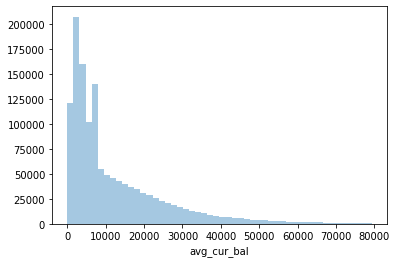

In [361]:
# avg_cur_bal

df_copy['avg_cur_bal'] = df_copy['avg_cur_bal'].fillna(df_copy['avg_cur_bal'].median())
avgcb_no_outliers = plot_feature(df_copy['avg_cur_bal'], iq_range=0.98, return_mask = True)
df_copy['avg_cur_bal'] = df_copy['avg_cur_bal'].mask(avgcb_no_outliers == False)
df_copy['avg_cur_bal'] = df_copy['avg_cur_bal'].fillna(df_copy['avg_cur_bal'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


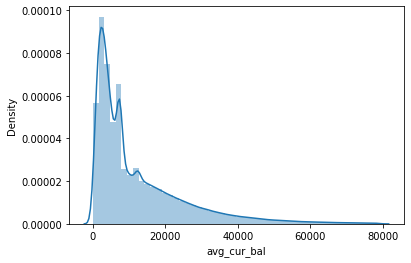

In [362]:
sns.distplot(df_copy['avg_cur_bal'])

In [363]:
np.sort(df_copy['mort_acc'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 34., 35., 36., 37., 47., 51.,
       nan])

0.0 1.0 7.0 7.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


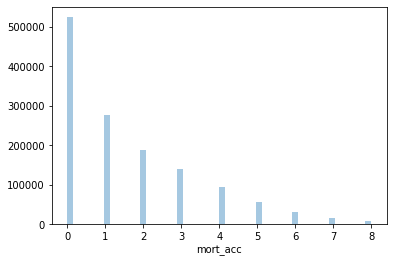

In [364]:
# mort_acc
df_copy['mort_acc'] = df_copy['mort_acc'].fillna(df_copy['mort_acc'].median())
ma_no_outliers = plot_feature(df_copy['mort_acc'], iq_range=0.97, return_mask = True)
df_copy['mort_acc'] = df_copy['mort_acc'].mask(ma_no_outliers == False)
df_copy['mort_acc'] = df_copy['mort_acc'].fillna(df_copy['mort_acc'].mean())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


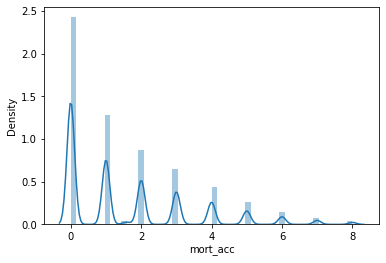

In [365]:
sns.distplot(df_copy['mort_acc'])

In [367]:
df_copya.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'fico_range_low', 'pub_rec',
       'revol_util', 'initial_list_status', 'avg_cur_bal', 'mort_acc'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


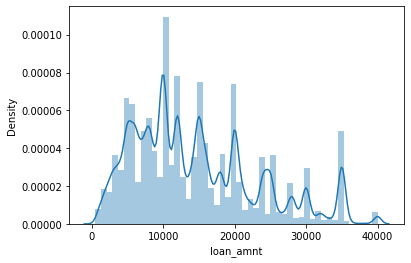

In [371]:
# loan_amount
'''Its look like there is no outliers in this column '''

sns.distplot(df_copy['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


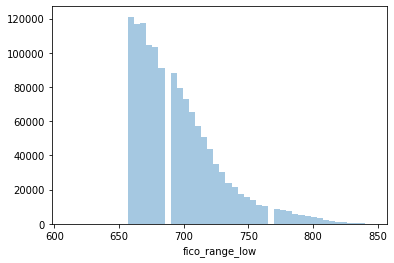

In [392]:
#fico_range_low
'''No outliers'''
sns.distplot(df_copy['fico_range_low'], kde = False)

In [393]:
df_copy['fico_range_low'].min()

610.0

In [373]:
df_copy['fico_range_low'].max()

845.0

In [394]:
#save cleaned data to working directory
df_copy.to_csv('clean_accepted.csv') 

In [298]:
# df_copya = df_copy.copy(deep= True)

In [ ]:
# df_rejected.shape

In [ ]:
# df_rejected.head()

In [ ]:
# miss_values_rejected = null_values(df_rejected)
# miss_values_rejected.head(6)

In [ ]:
# common_columns = np.intersect1d(df_accepted.columns, df_rejected.columns)